# BIODIVERSITY DATA ANALYSIS REPORT
# Introduction

We will analyze biodiversity data from national species conservation parks.
Source of data is from Codecademy.com - Biodiversity Portfolio Project

Objective:
- Investigate the distribution of observations.
- Explore which park has the highest number of observations.
- Discover which species is the most common in all parks.
- Evaluate the most common conservation status among the species in the parks.
- Finding out if there is a significant difference in observations between each park.
- Explore if there is a significant difference between species and its conservation status.
- Investigate the distribution of endangered species in each park.
- Investigate which category of organisms mostly belong to the endangered species.
- Investigate the diversity index (_how diverse the species is_) in each park using Shannon's index.

### Import Python Modules:
Let's import important modules for this project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Observation dataset
The `observations` dataset contains information about scientific names, park names and observations.

In [4]:
observation = pd.read_csv('observations.csv')
observation.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [15]:
print(observation.info())
print(observation.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
scientific_name    object
park_name          object
observations        int64
dtype: object


* There is no missing data in each column of `observation` dataframe.
* Each column has appropriate data types. 

In [17]:
print(observation["park_name"].unique())
print(observation["scientific_name"].nunique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
5541


There are 5541 different scientific names found.

In [55]:
observation.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

There is no missing value in observation dataframe.

In [60]:
observation.duplicated().sum()

15

There are 15 duplicates in `observation` dataframe.

In [62]:
observation.drop_duplicates(inplace=True)
observation.duplicated().sum()

0

After removing duplicates, no more duplicates were found.

In [5]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [6]:
print(species.info())
print(species.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


* Each column has 5824 rows except `conservation_status` which is only 191.
* Most of the data in `conservation_status` column is missing hence need further exploration.
* All datatypes are relevant.

In [7]:
species.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

There are 5633 missing values in `conservation_status` column of species dataframe.

In [8]:
species['conservation_status'].fillna('No Intervention', inplace=True)

Filling missing values with `No Intervention`

In [100]:
species.duplicated().sum()

0

There is no duplicate data in `species` dataframe after replacing missing values with `No Intervention`.

In [101]:
print(species["category"].unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


The category of species are mammal, bird, reptile, amphibian, fish, vascular plant and nonvascular plant.

In [57]:
print(species["conservation_status"].unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


`nan` is the missing data in the `conservation_status` column.

In [102]:
species.fillna('No Intervention', inplace=True)
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


We replace `nan` with `No Intervention`.

In [14]:
merged_data = observation.merge(species, on='scientific_name', how='left')
merged_data.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Intervention
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Intervention


Merge both `observation` and `species` dataframes into a single dataframe called `merged_data` on `scientific_name`

In [15]:
merged_data.isnull().sum()

scientific_name        0
park_name              0
observations           0
category               0
common_names           0
conservation_status    0
dtype: int64

* There are 24721 missing data in `conservation_status` column.
* We need to replace the missing data with `No Intervention`.

In [16]:
merged_data['conservation_status'].fillna('No Intervention', inplace=True)
merged_data.isnull().sum()

scientific_name        0
park_name              0
observations           0
category               0
common_names           0
conservation_status    0
dtype: int64

No missing data in `conservation_status` column.

In [17]:
merged_data.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Intervention
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Intervention


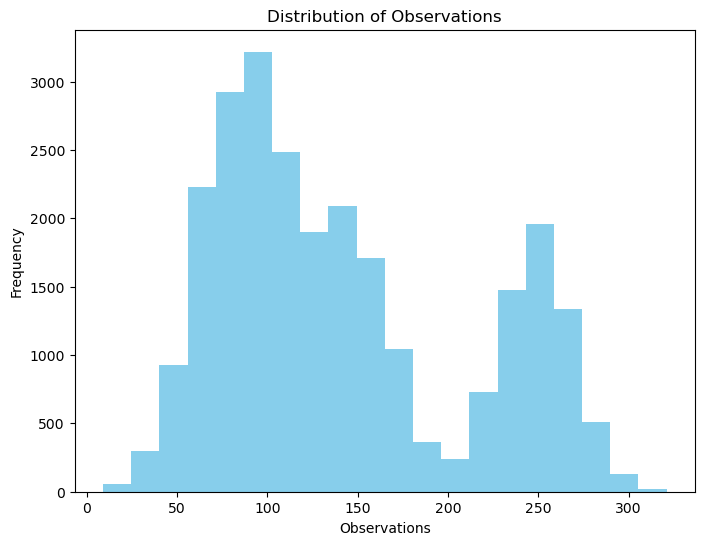

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize=(8, 6))
plt.hist(merged_data['observations'], bins=20, color='skyblue')
plt.xlabel('Observations')
plt.ylabel('Frequency')
plt.title('Distribution of Observations')
plt.show()
plt.clf()
plt.savefig('distributionofobservations.png')

- There is a bimodal distribution of observations.
- The highest frequency is at around 100 and 250 observations.

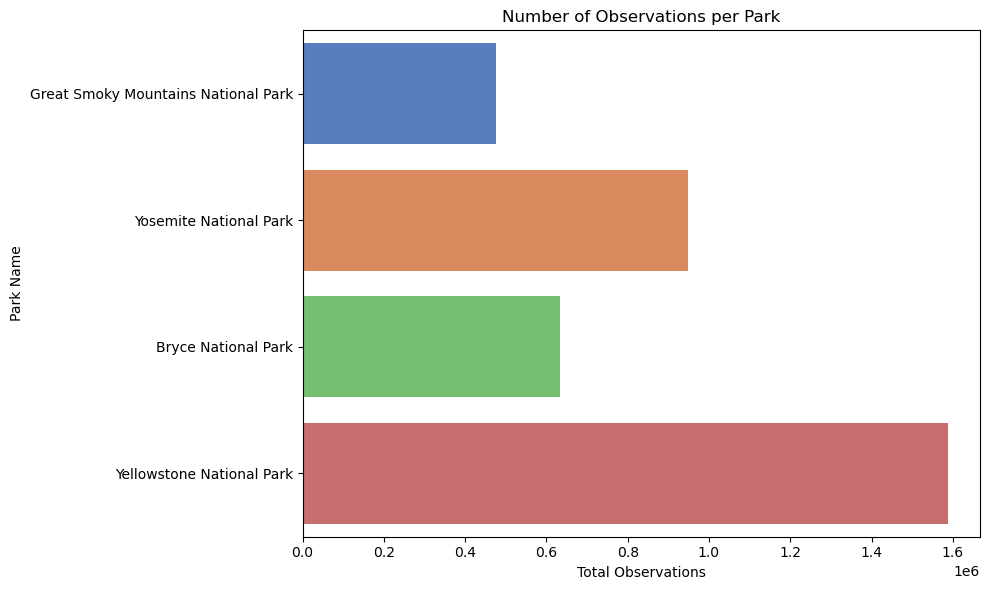

<Figure size 640x480 with 0 Axes>

In [19]:
# Create a bar plot to show the number of observations for each park
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_data, y='park_name', x='observations', estimator=sum, errorbar=None, palette='muted')
plt.ylabel('Park Name')
plt.xlabel('Total Observations')
plt.title('Number of Observations per Park')
plt.tight_layout()
plt.show()
plt.clf()

Yellowstone National Park has the highest observations

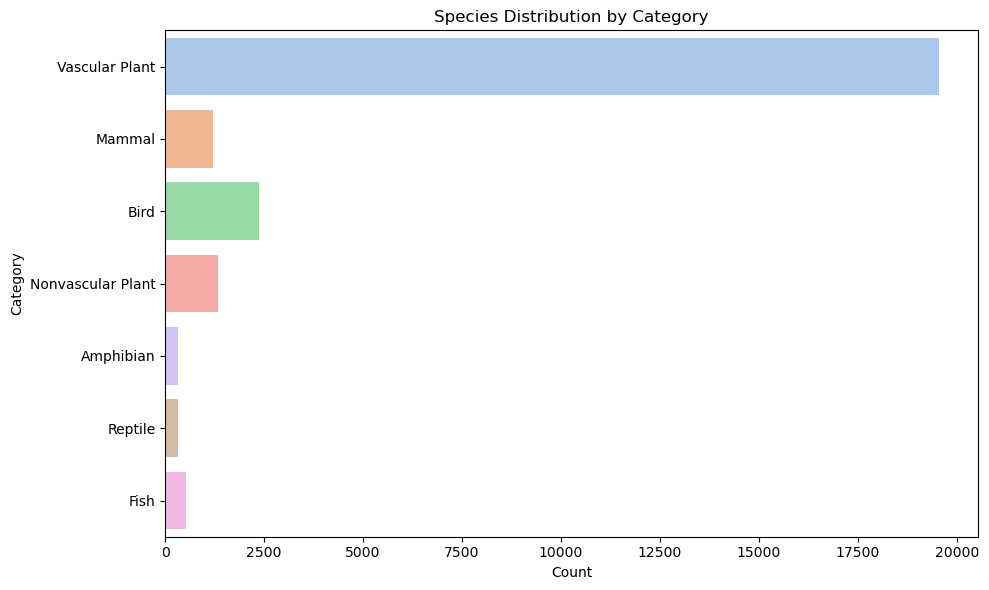

<Figure size 640x480 with 0 Axes>

In [20]:
# Create a bar plot to show the distribution of species in different categories
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, y='category', palette='pastel')
plt.ylabel('Category')
plt.xlabel('Count')
plt.title('Species Distribution by Category')
plt.tight_layout()
plt.show()
plt.clf()

Vascular plant is the most commonly found species.

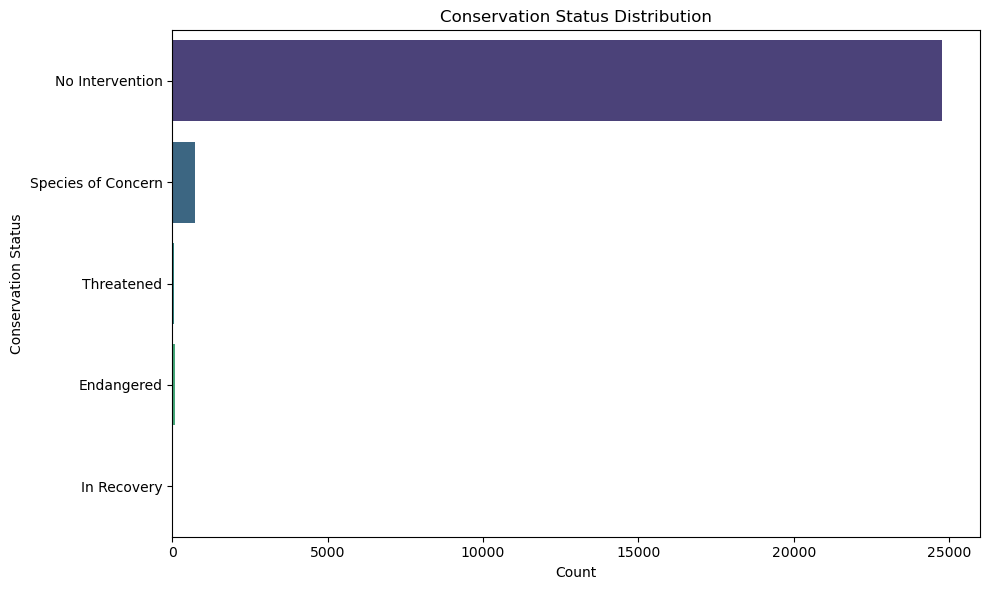

In [21]:
# Create a bar plot to show the conservation status distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, y='conservation_status', palette='viridis')
plt.ylabel('Conservation Status')
plt.xlabel('Count')
plt.title('Conservation Status Distribution')
plt.tight_layout()
plt.show()


Most of the `conservation_status` is without intervention.

###### Hypothesis Testing (ANOVA):
- Test if there is a significant difference in observations between different parks, we can use Analysis of Variance (ANOVA). 

In [22]:
import scipy.stats as stats

# Perform ANOVA test
result_anova = stats.f_oneway(
    merged_data[merged_data['park_name'] == 'Great Smoky Mountains National Park']['observations'],
    merged_data[merged_data['park_name'] == 'Yosemite National Park']['observations'],
    merged_data[merged_data['park_name'] == 'Bryce National Park']['observations'],
    merged_data[merged_data['park_name'] == 'Yellowstone National Park']['observations']
)

# Print the results
print("ANOVA p-value:", result_anova.pvalue)
if result_anova.pvalue < 0.05:
    print("There is a significant difference in observations between different parks.")
else:
    print("There is no significant difference in observations between different parks.")


ANOVA p-value: 0.0
There is a significant difference in observations between different parks.


In [23]:
# Assuming you have a 'category' column and 'conservation_status' column in the 'species' DataFrame
# Replace 'species' with the actual DataFrame name

# Group by 'category' and calculate the percentage of endangered species in each category
endangered_percentage_by_category = merged_data.groupby('category')['conservation_status'].apply(
    lambda x: (x == 'Endangered').mean() * 100
).reset_index(name='endangered_percentage')

# Sort the results in descending order of the endangered percentage
endangered_percentage_by_category = endangered_percentage_by_category.sort_values(
    by='endangered_percentage', ascending=False
)

# Display the results
endangered_percentage_by_category

,category,endangered_percentage
3,Mammal,3.666667
2,Fish,2.290076
0,Amphibian,1.219512
1,Bird,0.676819
6,Vascular Plant,0.020450
4,Nonvascular Plant,0.000000
5,Reptile,0.000000


Most of the mammal belongs to the endangered status.

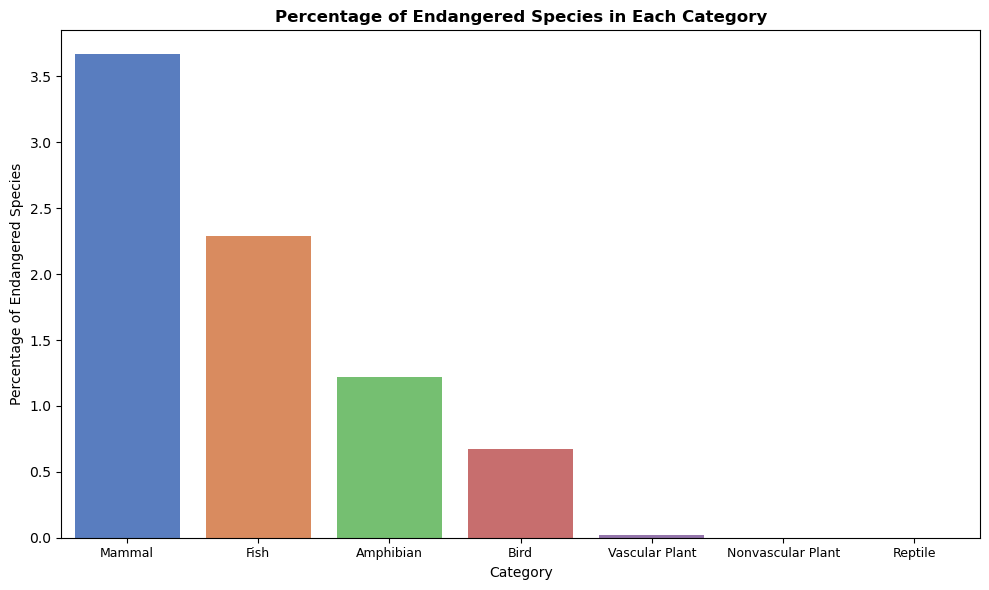

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x=endangered_percentage_by_category['category'], y=endangered_percentage_by_category['endangered_percentage'], palette="muted")
plt.xticks(fontsize=9)
plt.xlabel('Category')
plt.ylabel('Percentage of Endangered Species')
plt.title('Percentage of Endangered Species in Each Category', fontweight='bold')
plt.tight_layout()
plt.show()

The most endangered species is mammal.

In [112]:
from scipy.stats import chi2_contingency

# Assuming you have a 'species' column and a 'conservation_status' column in the 'species' DataFrame
# Replace 'species' with the actual DataFrame name

# Create a contingency table of 'species' and 'conservation_status'
contingency_table = pd.crosstab(merged_data['category'], merged_data['conservation_status'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square:", chi2)
print("p-value:", p_value)

if p_value < 0.05:
    print("The differences between species and their conservation status are significant.")
else:
    print("The differences between species and their conservation status are not significant.")


Chi-Square: 3130.21754931616
p-value: 0.0
The differences between species and their conservation status are significant.


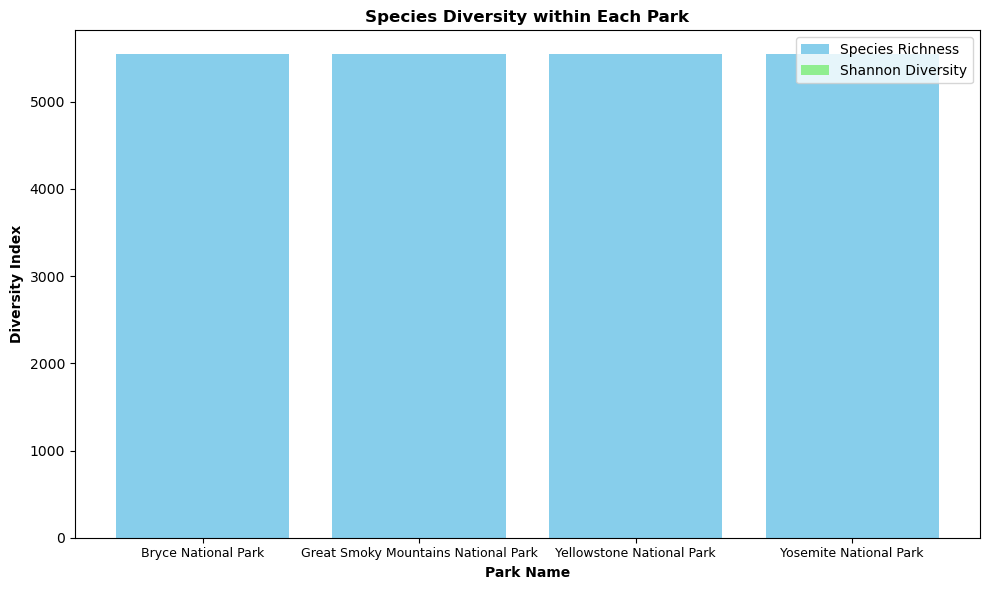

<Figure size 640x480 with 0 Axes>

In [151]:
# Calculate species richness (total number of unique species) for each park
species_richness = merged_data.groupby('park_name')['scientific_name'].nunique().reset_index(name='species_richness')

# Calculate Shannon diversity index for each park
def shannon_diversity_index(observed_values):
    total_species = observed_values.sum()
    if total_species == 0:
        return 0
    proportions = observed_values / total_species
    return -(proportions * np.log1p(proportions)).sum()

shannon_diversity = merged_data.groupby('park_name')['scientific_name'].value_counts().unstack().apply(shannon_diversity_index, axis=1).reset_index(name='shannon_diversity')

# Merge the two diversity metrics into a single DataFrame
park_diversity = pd.merge(species_richness, shannon_diversity, on='park_name')

# Visualize species diversity using bar plots
plt.figure(figsize=(10, 6))
plt.bar(park_diversity['park_name'], park_diversity['species_richness'], color='skyblue', label='Species Richness')
plt.bar(park_diversity['park_name'], park_diversity['shannon_diversity'], color='lightgreen', label='Shannon Diversity')
plt.xticks(fontsize=9)
plt.xlabel('Park Name', fontweight="bold")
plt.ylabel('Diversity Index', fontweight="bold")
plt.title('Species Diversity within Each Park', fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()
plt.clf()

Each park is equally diverse in species.

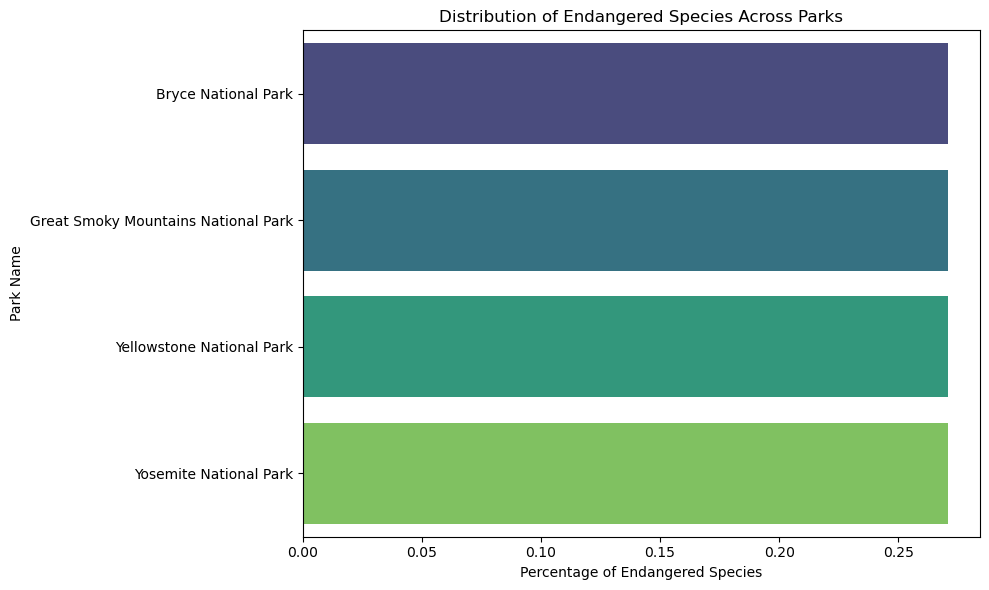

<Figure size 640x480 with 0 Axes>

In [32]:
# Calculate the total number of species and the number of endangered species in each park
total_species_per_park = merged_data.groupby('park_name')['scientific_name'].nunique()
endangered_species_per_park = merged_data[merged_data['conservation_status'] == 'Endangered'].groupby('park_name')['scientific_name'].nunique()

# Calculate the percentage of endangered species in each park
percentage_endangered_per_park = (endangered_species_per_park / total_species_per_park) * 100

# Visualize the distribution of endangered species across parks
plt.figure(figsize=(10, 6))
sns.barplot(y=percentage_endangered_per_park.index, x=percentage_endangered_per_park.values, palette='viridis')
plt.ylabel('Park Name')
plt.xlabel('Percentage of Endangered Species')
plt.title('Distribution of Endangered Species Across Parks')
plt.tight_layout()
plt.show()
plt.clf()

Each park has equal percentage of endangered species.

# Conclusion:
- 100 and 250 observations are the most frequently found in the parks. Require additional data about why the specific number of observations is most common.
- YellowStone National Park has the highest observations. Require additional data about each park to explore any factors that is associated with the high number of observations.
- Vascular plant has the highest number of species by category. 
- Most of the conservation status is without any interventions.
- There is a significant difference in observations between different parks.
- Mammal is the most endangered species found.
- There is a significant difference between the species and their conservation status.
- There is an equal percentage of endangered species and rate of diversity in each park. 

# Further Research
- __Temporal Trends:__ Explore how the number of observations varies over time. We can analyze if there are seasonal patterns in species sightings, whether certain species have seen changes in their observations over the years, or if there are any long-term trends in the data.

- __Conservation Status and Park Size:__ Investigate if there is any correlation between a park's size and the number of species within it or if larger parks tend to have a higher percentage of endangered species.

- __Species Interactions:__ Explore the relationships between different species within the same park. Investigate predator-prey relationships, symbiotic associations, or competition among species.

- __Geographic Analysis:__ If latitude and longitude data are available, conduct a geographic analysis to identify spatial patterns in species distributions, hotspots of biodiversity, or potential corridors for species movement.

- __Impact of Conservation Efforts:__ If additional data on conservation efforts are available, assess their effectiveness by comparing the observations before and after implementing specific conservation measures.

- __Visitor Impact:__ Investigate the potential impact of visitor activities on species observations. Analyze if certain species are more or less likely to be observed in parks with higher visitor footfall.

- __Data Completeness and Bias:__ Analyze the completeness and potential biases in the data. Assess if certain species are over- or under-represented due to data collection methods or observer bias.

- __Species Identification Challenges:__ Investigate cases where species identification may be ambiguous or uncertain. Analyze how such cases might affect the accuracy of the observations.